In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### users: 전처리된 processed_users.csv 만들기

In [83]:
path='./data/'

users = pd.read_csv('processed_users.csv')
books = pd.read_csv(path+'books.csv')
ratings = pd.read_csv(path+'train_ratings.csv')

In [11]:
users.sample(3)

,Unnamed: 0,user_id,location,age,location_city,location_state,location_country
29545,29794,221420,"crotononhudson,newyork,usa",NaN,crotononhudson,newyork,usa
16408,16542,130473,"byram,mississippi,usa",33.0,byram,mississippi,usa
64156,64836,136171,"jackson,alabama,usa",64.0,jackson,alabama,usa


In [13]:
users.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
users.sample(3)

,user_id,location,age,location_city,location_state,location_country
26109,231005,"chicago,illinois,usa",NaN,chicago,illinois,usa
66862,246114,"mnchen,bayern,germany",48.0,mnchen,bayern,germany
16681,66533,"warrensburg,missouri,",NaN,warrensburg,missouri,usa


In [15]:
users.drop(['location'], axis=1, inplace=True)

In [22]:
users.sample(3)

,user_id,age,location_city,location_state,location_country
66213,250731,NaN,sanfrancisco,california,usa
12634,185538,28.0,london,england,unitedkingdom
3480,226665,56.0,remsen,newyork,usa


In [18]:
# city별 평균 age로 처리하기
# city가 nan이면 nan이 아닌 값들의 전체 평균으로
city_average_age = users.groupby('location_city')['age'].agg(pd.Series.mean)

In [19]:
city_average_age

location_city
a              27.666667
aaaaaaa              NaN
aachen         31.215686
aalen          21.000000
aarau          36.666667
                 ...    
zurich         31.133333
zweibrcken     23.500000
zwickau        14.000000
zwijndrecht          NaN
zwingenberg    48.000000
Name: age, Length: 11542, dtype: float64

In [21]:
age_nan_idx = users[(users['age'].isna())].index
age_nan_idx

Int64Index([    0,     5,     6,     8,     9,    21,    22,    26,    27,
               30,
            ...
            67321, 67323, 67326, 67330, 67335, 67336, 67337, 67339, 67348,
            67352],
           dtype='int64', length=27506)

In [23]:
# age_nan_idx = users[(users['age'].isna())].index
for idx in age_nan_idx:
    try:
        print(users.iloc[idx, 1])
        # tmp: age 결측값이 있는 user가 사는 city의 평균 age를 저장한 값
        tmp = city_average_age[users.iloc[idx, 2]]
        # age 결측값이 있는 user가 사는 city의 평균 age 가 NaN이 아닌 경우를 위해
        if tmp != np.nan:
            users.iloc[idx, 1] = tmp
            print(users.iloc[idx, 1])
        else:
            print(5)
    except:
        # age 결측값이 있는 user가 사는 city의 평균 age를 구할 수 없는 경우
        continue

nan
23.0
nan
35.96190476190476
nan
36.59016393442623
nan
nan
nan
32.0625
nan
45.0
nan
35.0989010989011
nan
40.46666666666667
nan
36.41580756013746
nan
41.8125
nan
45.125
nan
60.0
nan
36.604166666666664
nan
32.42857142857143
nan
35.1436170212766
nan
37.57446808510638
nan
40.22439024390244
nan
37.1900826446281
nan
34.78378378378378
nan
34.11357340720222
nan
31.8
nan
34.78378378378378
nan
23.0
nan
42.333333333333336
nan
39.875
nan
32.68421052631579
nan
nan
nan
38.588235294117645
nan
58.5
nan
nan
nan
34.5
nan
34.76470588235294
nan
37.18518518518518
nan
30.125
nan
52.5
nan
31.0
nan
50.0
nan
26.0
nan
nan
nan
36.89473684210526
nan
44.92
nan
15.0
nan
nan
nan
36.36363636363637
nan
37.875
nan
37.875
nan
34.8
nan
36.47826086956522
nan
34.0
nan
20.833333333333332
nan
37.57446808510638
nan
33.42857142857143
nan
31.833333333333332
nan
35.0
nan
48.2
nan
34.0
nan
36.34146341463415
nan
37.0
nan
nan
nan
39.54545454545455
nan
32.76923076923077
nan
nan
nan
28.0
nan
40.46875
nan
35.26315789473684
nan
40.0


In [28]:
new_age_nan_idx = users[(users['age'].isna())].index
print(1 - (len(age_nan_idx) - len(new_age_nan_idx)) / len(age_nan_idx))

0.11539300516250994


In [29]:
users['age'] = users['age'].fillna(int(users['age'].mean()))

In [30]:
_new_age_nan_idx = users[(users['age'].isna())].index
print(len(_new_age_nan_idx))

0


In [31]:
users.to_csv('processed_users_2.csv')

In [60]:
books['category'].value_counts().to_frame()

,category
['Fiction'],32956
['Juvenile Fiction'],5804
['Biography & Autobiography'],3320
['History'],1925
['Religion'],1818
...,...
['Disguise'],1
['Country lawyers'],1
"['Humorous stories, Brazilian']",1
['Coasts'],1


처리하기 전의 category_high:  
print(books['category_high'].nunique())  
print(books['category_high'].nunique() / len(books) * 100,"%")  
480  
0.32091997058233607 %  

In [78]:
# # 처리하기 전의 category_high
# books['category_high'] = books['category'].copy()

# books.loc[books[books['category']=='biography'].index, 'category_high'] = 'biography autobiography'
# books.loc[books[books['category']=='autobiography'].index,'category_high'] = 'biography autobiography'
# books.loc[books[books['category'].str.contains('history',na=False)].index,'category_high'] = 'history'

# categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
# 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
# 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
# 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']
# for category in categories:
#     books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

# category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
# category_high_df.columns = ['category','count']
# others_list = category_high_df[category_high_df['count']<5]['category'].values
# books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'
# books.drop('category', axis=1, inplace=True)

In [79]:
# # 처리하기 전의 category_high
# print(books['category_high'].nunique())
# print(books['category_high'].nunique() / len(books) * 100,"%")

480
0.32091997058233607 %


- books에 fiction인데 대문자 소문자 차이도 존재하기 때문에, category열은 다 소문자화시켜야함
- 그리고 대괄호 [ ] 이거랑 특수문자 좀 거슬려서 지워버림

In [84]:
print(books['category'].nunique())

4292


In [85]:
def basic_preporcess_category(s:str):
    if isinstance(s, str):
        return s.lower().strip('[] !@#$%^&*()\"\';:.,/?\\|~`')
    elif isinstance(s, float):
        return np.nan
    else:
        raise Exception("WTF")

In [86]:
# books['category'] = books['category'].apply(lambda x: x.lower().strip('[').strip(']'))
df = books['category'].apply(lambda x: basic_preporcess_category(x))

In [87]:
df

0         actresses
1         1940-1949
2           medical
3           fiction
4           history
            ...    
149565        humor
149566       nature
149567          NaN
149568      fiction
149569          NaN
Name: category, Length: 149570, dtype: object

In [88]:
df.nunique()

4110

In [89]:
books['category'] = books['category'].apply(lambda x: basic_preporcess_category(x))

In [90]:
# category_high
books['category_high'] = books['category'].copy()

books.loc[books[books['category']=='biography'].index, 'category_high'] = 'biography autobiography'
books.loc[books[books['category']=='autobiography'].index,'category_high'] = 'biography autobiography'
books.loc[books[books['category'].str.contains('history',na=False)].index,'category_high'] = 'history'

categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']
for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
others_list = category_high_df[category_high_df['count']<5]['category'].values
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'
books.drop('category', axis=1, inplace=True)

In [92]:
books.sample(1)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,summary,img_path,category_high
42407,0373821654,Lights Of Home,Marilyn Pappano,1999.0,Harlequin,http://images.amazon.com/images/P/0373821654.0...,NaN,NaN,images/0373821654.01.THUMBZZZ.jpg,NaN


In [93]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_url                    0
language               67227
summary                67227
img_path                   0
category_high          68851
dtype: int64

In [98]:
books['category_high'].nunique()

413

In [97]:
books['category_high'].value_counts().to_frame()

,category_high
fiction,39678
others,4136
biography & autobiography,3326
history,1949
religion,1824
...,...
questions and answers,5
internet,5
alchemists,5
executive ability,5


In [99]:
print(len(books[books['category_high'] == 'biography autobiography']))

9


In [100]:
print(len(books[books['category_high'] == 'biography & autobiography']))

3326


- 베이스라인 전처리 코드에서 저게 이상했네

In [101]:
books.loc[books['category_high'] == 'biography autobiography', 'category_high'] = 'biography & autobiography'

In [102]:
print(len(books[books['category_high'] == 'biography autobiography']))

0


In [103]:
print(len(books[books['category_high'] == 'biography & autobiography']))

3335


In [117]:
tmp = books['category_high'].value_counts()

In [118]:
print(tmp)

fiction                      39678
others                        4136
biography & autobiography     3335
history                       1949
religion                      1824
                             ...  
questions and answers            5
internet                         5
alchemists                       5
executive ability                5
ducks                            5
Name: category_high, Length: 412, dtype: int64


<BarContainer object of 412 artists>

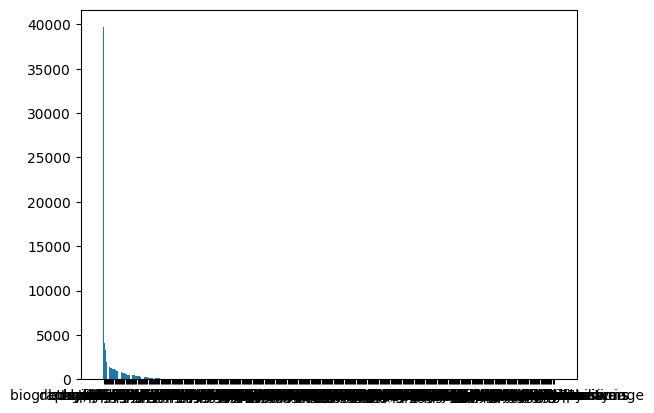

In [119]:
plt.bar(tmp.index, tmp.values)

- 세부 장르 구분하는 노가다하면 좀 빡셀 것 같아서, 그냥 fiction vs non-fiction이 날 것 같음

In [131]:
books.sample(1)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,summary,img_path,category_high
70476,0192824058,"Winesburg, Ohio (World's Classics)",Sherwood Anderson,1997.0,Oxford University Press,http://images.amazon.com/images/P/0192824058.0...,NaN,NaN,images/0192824058.01.THUMBZZZ.jpg,NaN


#### summary 가지고 pre trained 모델로 category 채우는 것도 가능
#### book title 가지고 pre trained 모델로 category 채우는 것도 가능

- 책 제목으로 fiction / non-fiction 채우는 pre-trained 발견함
- summary를 가지고 category를 찾는 것은 못 찾았음
시도해볼 수 있는 것:
1. 결측치인 애들은 그냥 fiction/non-fiction 으로 채우고 나머지는 그대로 category-high로 두기 -> 이러고 학습
2. fiction 카테고리인 애들 제외하고 나머지를 그냥 non-fiction으로 넣어버리기 -> 그리고는 0, 1로 바꿔버리기
3. 그냥 노가다로 412개 같이 해버리고 싶긴함 그렇게 해서 카테고리 20개 정도로 줄일 수 있으면 좋겠음

1번 2번 둘 다 해봐서 성능 비교하기

#### 결측치인 애들은 그냥 fiction/non-fiction 으로 채우고 나머지는 그대로 category-high로 두기 -> 이러고 학습  
-> 이렇게하면, 결측치인 것들과 결측치 아닌 것들의 카테고리 분류 기준이 다르기 떄문에 동등한 비교가 아닌 것 같긴하다

In [125]:
MODEL_NAME = 'BritishLibraryLabs/bl-books-genre'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [132]:
def title2genre(s:str):
    if isinstance(s, str):
        return classifier(s)
    elif isinstance(s, float):
        return np.nan
    else:
        raise Exception('WTF')

In [133]:
title2category = books['book_title'].apply(lambda x: title2genre(x))

In [134]:
title2category.to_csv('title2category.csv')

In [135]:
books['book_title'].nunique()

135436

In [136]:
print(len(books))

149570


In [137]:
print(books['isbn'].nunique())

149570


In [138]:
books.to_csv('basic_preprocess_books.csv')

In [159]:
isbn_title_dataset = pd.DataFrame({'isbn':[], 'book_title':[], 'label':[], 'score':[]}, index=[])
isbn_title_dataset

,isbn,book_title,label,score


In [164]:
isbn_title_dataset

,isbn,book_title,label,score
0,0002005018,Clara Callan,Fiction,0.996552
1,0060973129,Decision in Normandy,Non-fiction,0.999945
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Fiction,0.834961
3,0399135782,The Kitchen God's Wife,Fiction,0.999915


In [165]:
import tqdm
import time

In [168]:
start_time = time.time()
for idx, (isbn, title) in tqdm.tqdm(enumerate(zip(books['isbn'].values, books['book_title'].values))):
    tmp = dict(title2genre(title)[0])
    isbn_title_dataset.loc[idx] = [isbn, title, tmp['label'], tmp['score']]

149570it [59:53, 41.63it/s]


In [169]:
isbn_title_dataset.sample(1)

,isbn,book_title,label,score
806,0816152446,The Women in His Life (G K Hall Large Print Bo...,Fiction,0.999607


In [170]:
isbn_title_dataset.to_csv('isbn_title_dataset.csv')

In [171]:
isbn_title_dataset['label'] = isbn_title_dataset['label'].apply(lambda x: x.lower())

In [174]:
category_nan_idx = books[(books['category_high'].isna())].index

In [175]:
# books.loc[books['category_high'].isna(), 'category_high'] = 
for idx in category_nan_idx:
    try:
        tmp = isbn_title_dataset[(isbn_title_dataset['isbn'] == books.iloc[idx]['isbn'])]['label']
        print(tmp)
        break
    except:
        continue

5    non-fiction
Name: label, dtype: object


In [176]:
isbn_title_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149570 entries, 0 to 149569
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   isbn        149570 non-null  object 
 1   book_title  149570 non-null  object 
 2   label       149570 non-null  object 
 3   score       149570 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.7+ MB


In [185]:
books.sample(1).iloc[0, 9]

'religion'

In [ ]:
print(len(category_nan_idx))

In [ ]:
# books.loc[books['category_high'].isna(), 'category_high'] = 
for idx in category_nan_idx:
    try:
        tmp = isbn_title_dataset[(isbn_title_dataset['isbn'] == books.iloc[idx]['isbn'])]['label']
        books.iloc[idx, 9] = tmp
    # books의 isbn 열은 결측치가 없고 isbn_title_dataset은 결측치가 없어서 except 발생 안하긴 함
    except:
        continue